In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('South Africa 2020-08-01 to 2023-04-10.csv')
df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,South Africa,2020-08-01,24.3,4.1,13.6,24.3,3.5,13.4,-4.0,36.7,...,13.8,7,NaN,2020-08-01T06:45:30,2020-08-01T17:41:55,0.42,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."
1,South Africa,2020-08-02,25.0,4.8,14.5,25.0,3.9,14.4,-2.1,35.9,...,14.1,6,NaN,2020-08-02T06:44:53,2020-08-02T17:42:24,0.46,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."
2,South Africa,2020-08-03,23.4,4.1,13.3,23.4,4.1,13.2,-0.3,44.1,...,14.6,7,NaN,2020-08-03T06:44:14,2020-08-03T17:42:52,0.50,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."
3,South Africa,2020-08-04,23.8,2.8,12.7,23.8,2.8,12.5,-2.8,39.8,...,14.7,7,NaN,2020-08-04T06:43:35,2020-08-04T17:43:21,0.52,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."
4,South Africa,2020-08-05,24.3,4.0,14.0,24.3,4.0,13.9,-2.2,37.5,...,14.5,7,NaN,2020-08-05T06:42:55,2020-08-05T17:43:49,0.56,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."


In [3]:
df.shape

(983, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              983 non-null    object 
 1   datetime          983 non-null    object 
 2   tempmax           983 non-null    float64
 3   tempmin           983 non-null    float64
 4   temp              983 non-null    float64
 5   feelslikemax      983 non-null    float64
 6   feelslikemin      983 non-null    float64
 7   feelslike         983 non-null    float64
 8   dew               983 non-null    float64
 9   humidity          983 non-null    float64
 10  precip            983 non-null    float64
 11  precipprob        983 non-null    int64  
 12  precipcover       983 non-null    float64
 13  preciptype        464 non-null    object 
 14  snow              983 non-null    int64  
 15  snowdepth         983 non-null    int64  
 16  windgust          982 non-null    float64
 1

In [5]:
df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          519
snow                  0
snowdepth             0
windgust              1
windspeed             0
winddir               0
sealevelpressure      2
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          527
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [6]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,...,983.000000,983.000000,981.000000,983.000000,983.000000,983.000000,983.000000,983.000000,456.000000,983.000000
mean,25.860936,11.990641,18.312208,25.504273,11.704069,18.136826,8.982096,59.713632,2.851523,46.490336,...,18.436012,155.787691,1022.099388,34.502747,13.101628,180.045473,15.535097,7.250254,10.449561,0.481872
std,4.559974,4.904762,4.216539,4.161045,5.329601,4.311046,6.228631,15.694793,8.698552,49.902059,...,6.435972,116.588621,4.213998,25.868935,1.759234,64.481183,5.577203,2.025408,2.940001,0.287676
min,12.300000,-2.100000,5.700000,12.300000,-6.500000,4.000000,-12.000000,16.300000,0.000000,0.000000,...,7.200000,0.300000,1010.000000,0.000000,7.900000,19.500000,1.700000,1.000000,10.000000,0.000000
25%,22.700000,8.100000,15.000000,22.700000,7.200000,15.000000,4.200000,48.000000,0.000000,0.000000,...,13.500000,50.800000,1019.200000,9.850000,11.800000,133.750000,11.500000,6.000000,10.000000,0.250000
50%,26.400000,13.500000,19.100000,26.300000,13.500000,19.100000,10.900000,61.600000,0.000000,0.000000,...,17.500000,115.600000,1021.700000,33.800000,13.200000,174.900000,15.100000,7.000000,10.000000,0.500000
75%,29.200000,15.800000,21.500000,28.600000,15.800000,21.500000,14.000000,70.950000,0.800000,100.000000,...,22.150000,275.200000,1024.700000,56.000000,14.350000,227.500000,19.600000,9.000000,10.000000,0.740000
max,37.100000,20.000000,26.700000,36.100000,20.000000,25.600000,18.800000,94.100000,91.024000,100.000000,...,46.300000,359.600000,1036.300000,98.500000,17.400000,358.200000,30.900000,10.000000,30.000000,0.980000


In [13]:
import pandas as pd

df['datetime'] = pd.to_datetime(df['datetime'])


In [14]:
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])


In [15]:
df['precipprob'] = df['precipprob'].astype('category')


In [16]:
df['conditions'] = df['conditions'].astype('category')
df['description'] = df['description'].astype('category')
df['icon'] = df['icon'].astype('category')


In [17]:
df['conditions_code'] = df['conditions'].cat.codes
df['description_code'] = df['description'].cat.codes
df['icon_code'] = df['icon'].cat.codes


In [28]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
                   'solarradiation','solarenergy', 'uvindex']

# Scale the data
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df[numeric_columns])
new_df = df[numeric_columns]
new_df


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,solarradiation,solarenergy,uvindex
0,-0.342487,-1.609590,-1.118122,-0.289563,-1.540124,-1.099324,-2.085322,-0.269137,-0.311264,-0.123620
1,-0.188899,-1.466799,-0.904568,-0.121251,-1.465033,-0.867244,-1.780124,-0.267586,-0.257446,-0.617599
2,-0.539957,-1.609590,-1.189307,-0.505965,-1.427488,-1.145740,-1.490989,-0.152765,-0.167749,-0.123620
3,-0.452192,-1.874774,-1.331676,-0.409786,-1.671533,-1.308196,-1.892566,-0.146559,-0.149810,-0.123620
4,-0.342487,-1.629989,-1.023210,-0.289563,-1.446260,-0.983284,-1.796187,-0.176040,-0.185689,-0.123620
...,...,...,...,...,...,...,...,...,...,...
978,0.162159,-0.181679,-0.026625,0.263464,-0.113400,0.014661,0.372326,-0.036393,-0.024235,0.370359
979,0.359629,0.042707,0.234385,0.407732,0.093100,0.269950,0.452642,-0.101561,-0.078053,-0.123620
980,0.535158,0.185498,0.566580,0.455821,0.224508,0.548446,0.179570,0.668047,0.675396,0.370359
981,0.469334,0.511877,0.519124,0.407732,0.524871,0.525238,0.404453,-0.078287,-0.078053,0.864338


In [23]:
segmentation_std

array([[-0.34248673, -1.6095902 , -1.11812235, ..., -0.12362037,
                nan, -0.21518401],
       [-0.18889893, -1.46679912, -0.90456849, ..., -0.61759932,
                nan, -0.07606801],
       [-0.53995675, -1.6095902 , -1.18930697, ..., -0.12362037,
                nan,  0.06304799],
       ...,
       [ 0.53515783,  0.18549767,  0.56658034, ...,  0.37035859,
        -0.15307995,  0.34127999],
       [ 0.46933449,  0.51187728,  0.51912392, ...,  0.86433754,
        -0.15307995,  0.48039599],
       [-1.52730688,  0.51187728, -0.40627614, ..., -1.60555724,
        -0.15307995,  0.58473299]])

<AxesSubplot:>

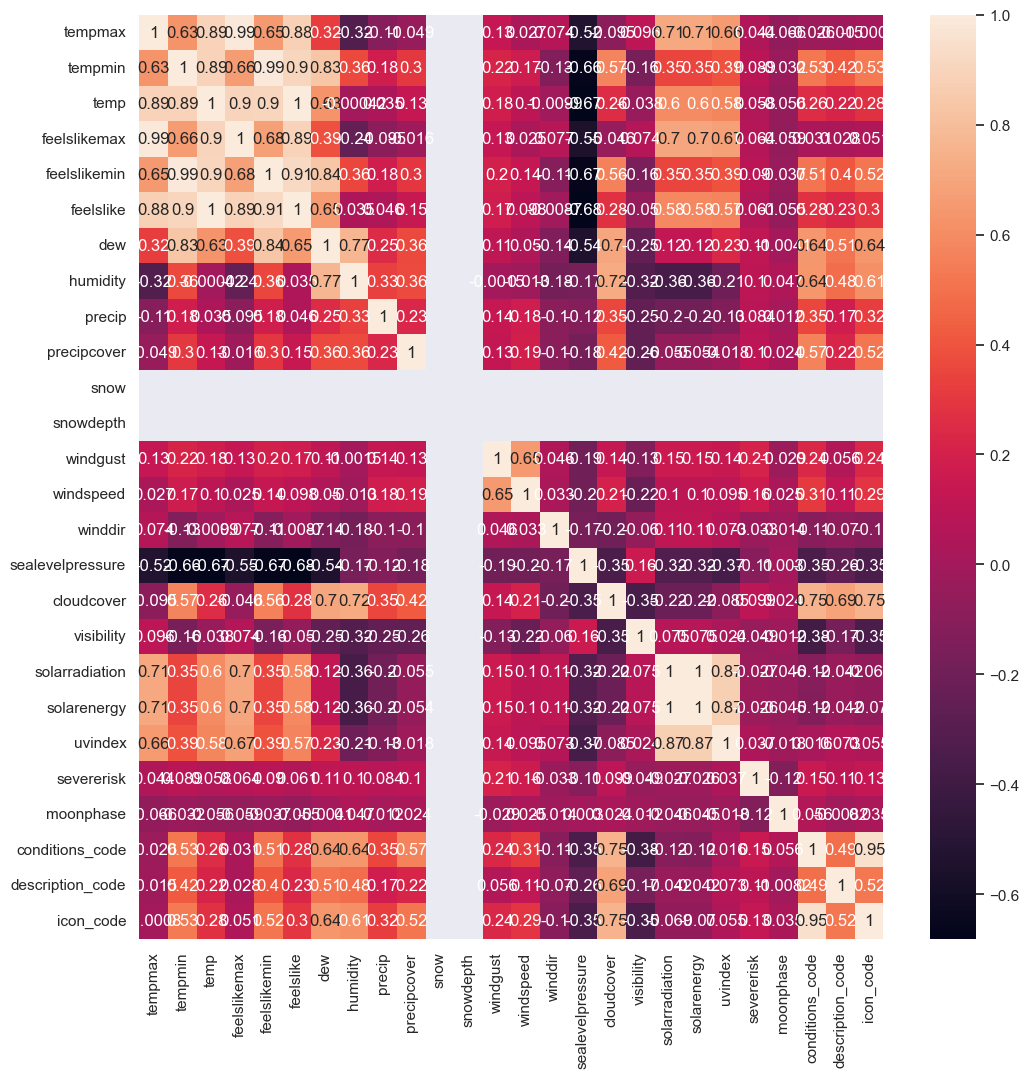

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

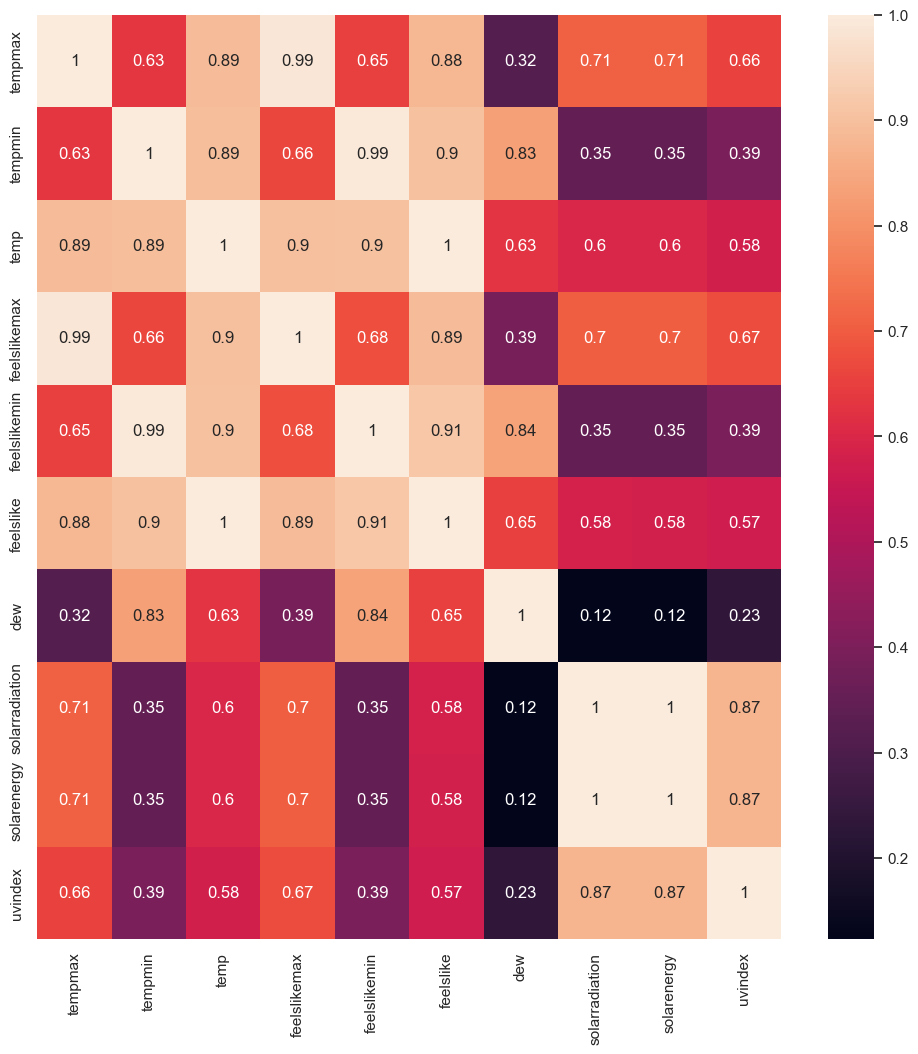

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df.corr(),annot=True)

c:\Users\hlala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hlala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hlala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hlala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hlala\anaconda3\lib\site-packages\sklearn\clust

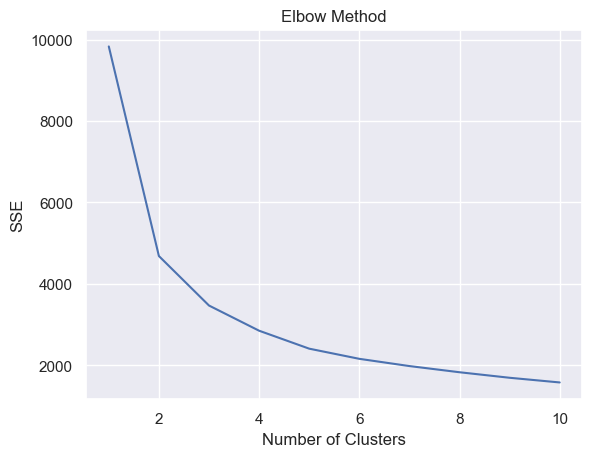

c:\Users\hlala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          tempmax   tempmin      temp  feelslikemax  feelslikemin  feelslike  \
cluster                                                                        
0       -0.951267 -0.916298 -1.028312     -0.966863     -0.923203  -1.025131   
1        0.615057  0.592447  0.664872      0.625141      0.596912   0.662815   

              dew  solarradiation  solarenergy   uvindex  
cluster                                                   
0       -0.675102       -0.803123    -0.802548 -0.844113  
1        0.436498        0.519272     0.518901  0.545775  


In [31]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# From the elbow plot, it seems like 3 clusters would be a good choice
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Print the average values of each feature for each cluster
print(df.groupby('cluster')[numeric_columns].mean())

In [32]:
df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sunset,moonphase,conditions,description,icon,stations,conditions_code,description_code,icon_code,cluster
0,2020-08-01,-0.342487,-1.609590,-1.118122,-0.289563,-1.540124,-1.099324,-2.085322,-1.467069,-0.327983,...,2020-08-01 17:41:55,-0.215184,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
1,2020-08-02,-0.188899,-1.466799,-0.904568,-0.121251,-1.465033,-0.867244,-1.780124,-1.518067,-0.327983,...,2020-08-02 17:42:24,-0.076068,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
2,2020-08-03,-0.539957,-1.609590,-1.189307,-0.505965,-1.427488,-1.145740,-1.490989,-0.995335,-0.327983,...,2020-08-03 17:42:52,0.063048,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
3,2020-08-04,-0.452192,-1.874774,-1.331676,-0.409786,-1.671533,-1.308196,-1.892566,-1.269451,-0.327983,...,2020-08-04 17:43:21,0.132606,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
4,2020-08-05,-0.342487,-1.629989,-1.023210,-0.289563,-1.446260,-0.983284,-1.796187,-1.416071,-0.327983,...,2020-08-05 17:43:49,0.271722,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2023-04-06,0.162159,-0.181679,-0.026625,0.263464,-0.113400,0.014661,0.372326,0.451741,-0.327983,...,2023-04-06 18:00:51,0.063048,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,FAJB,68263099999,FAWB,6826359...",0,13,0,1
979,2023-04-07,0.359629,0.042707,0.234385,0.407732,0.093100,0.269950,0.452642,0.324245,-0.327983,...,2023-04-07 17:59:51,0.202164,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,FAJB,68263099999,FAWB,6826359...",0,13,0,1
980,2023-04-08,0.535158,0.185498,0.566580,0.455821,0.224508,0.548446,0.179570,-0.396106,-0.327983,...,2023-04-08 17:58:50,0.341280,Clear,Clear conditions throughout the day.,clear-day,"FALA,FAGM,FASI,FAJB,E0397,FAWB,F0671,FAOR",0,13,0,1
981,2023-04-09,0.469334,0.511877,0.519124,0.407732,0.524871,0.525238,0.404453,-0.032743,-0.293477,...,2023-04-09 17:57:50,0.480396,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"FALA,FASI,FAJB,E0397,FAWB,FAOR",4,28,2,1


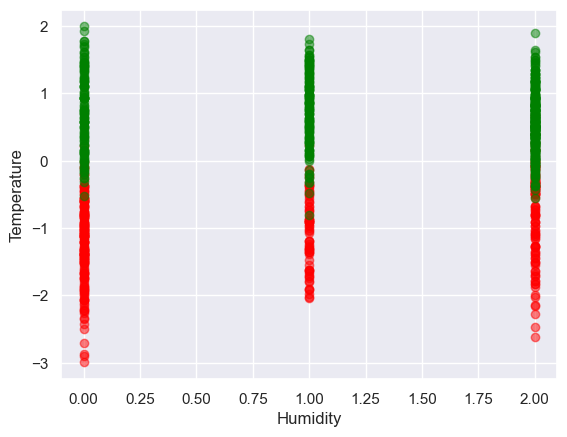

In [35]:
df['cluster'] = kmeans.labels_

# Plot the clusters
colors = ['red', 'green', 'blue', 'orange']
for i in range(4):
    plt.scatter(df[df['cluster']==i]['icon_code'], 
                df[df['cluster']==i]['temp'], 
                color=colors[i], alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [38]:
df.groupby('conditions').sum()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions_code,description_code,icon_code,cluster
conditions,,,,,,,,,,,,,,,,,,,,,
Clear,-17.160585,-236.641530,-136.083342,-37.421433,-228.908369,-143.492886,-274.054150,-242.200531,-102.330591,-165.563751,...,113.398001,-1.537472,-1.300624,-53.882903,-20.647125,-0.326951,0.0,4076.0,0.0,125
Partially cloudy,35.009179,15.646404,34.094488,31.038201,12.902313,32.681373,3.522877,-35.406643,-70.188290,-113.559752,...,71.176067,61.889360,62.426715,60.979516,-10.640923,-29.112004,214.0,6408.0,214.0,141
Rain,8.206334,-11.467404,-1.566182,4.382096,-11.745473,-2.972918,-20.940761,-26.267863,-0.610347,4.998031,...,2.521280,15.423749,15.241383,7.281039,-1.990039,-4.266495,82.0,298.0,82.0,28
"Rain, Overcast",-8.931060,0.029944,-4.522842,-9.358508,0.296543,-4.220179,2.423839,8.321122,2.870373,3.198628,...,-9.672842,-8.194580,-8.140027,-10.003702,-0.459240,-1.215036,15.0,115.0,10.0,0
"Rain, Partially cloudy",-15.004151,234.511346,110.690878,13.596824,229.971289,120.890953,291.502967,296.702245,170.218774,270.203664,...,-177.080349,-67.173824,-67.826487,-3.756351,33.737327,34.857439,1640.0,11192.0,820.0,303
"Snow, Rain",-2.119717,-2.078761,-2.612999,-2.237180,-2.516303,-2.886343,-2.454773,-1.148330,0.040082,0.723181,...,-0.342157,-0.407232,-0.400960,-0.617599,0.000000,0.063048,5.0,11.0,2.0,0


c:\Users\hlala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conditions', ylabel='count'>

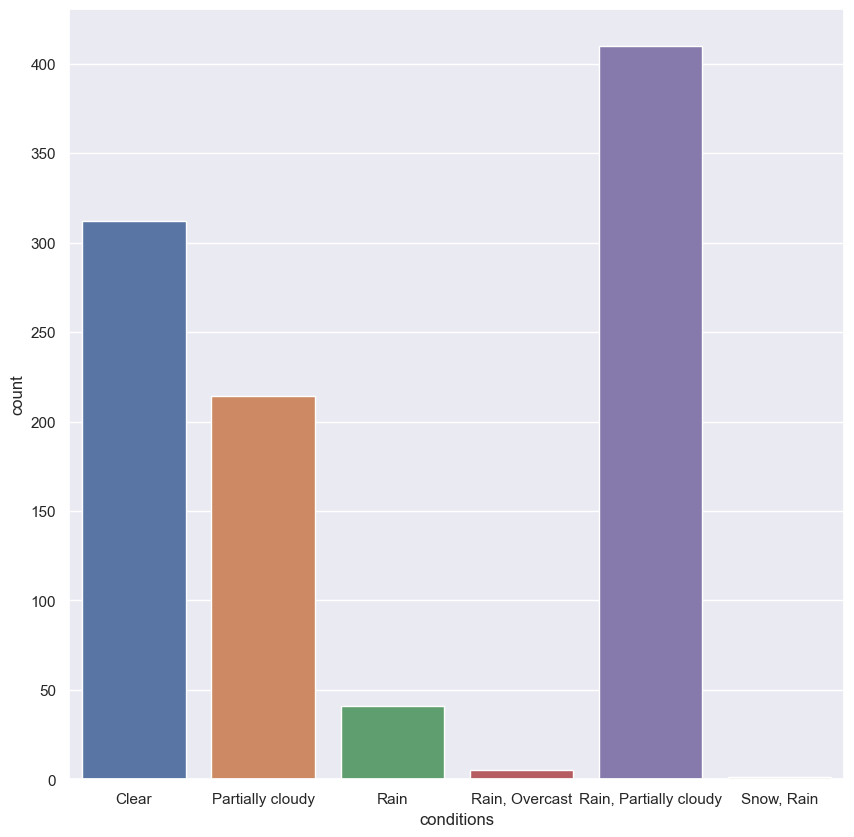

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(df['conditions'])

In [52]:
from sklearn.utils import resample

df_clear = df[df['conditions']=='Clear']
df_cloudy = df[df['conditions']=='Partially cloudy']
df_rainy = df[df['conditions']=='Rain']
df_overcast = df[df['conditions']=='Rain, Overcast']
df_partcloud = df[df['conditions']=='Rain, Partially cloudy']
df_snow = df[df['conditions']=='Snow, Rain']

# Upsample the minority classes
df_cloudy_upsampled = resample(df_cloudy, replace=True, n_samples=300, random_state=123)
df_clear_upsampled = resample(df_clear, replace=True, n_samples=300, random_state=123)
df_rainy_upsampled = resample(df_rainy, replace=True, n_samples=300, random_state=123)
df_overcast_upsampled = resample(df_overcast, replace=True, n_samples=300, random_state=123)
df_snow_upsampled = resample(df_snow, replace=True, n_samples=300, random_state=123)

# Downsample the majority classes 
df_partcloud_downsampled = resample(df_partcloud, replace=False, n_samples=300, random_state=123)

df2 = pd.concat([df_clear_upsampled,df_cloudy_upsampled,df_rainy_upsampled,df_overcast_upsampled,df_snow_upsampled,df_partcloud_downsampled])

c:\Users\hlala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conditions', ylabel='count'>

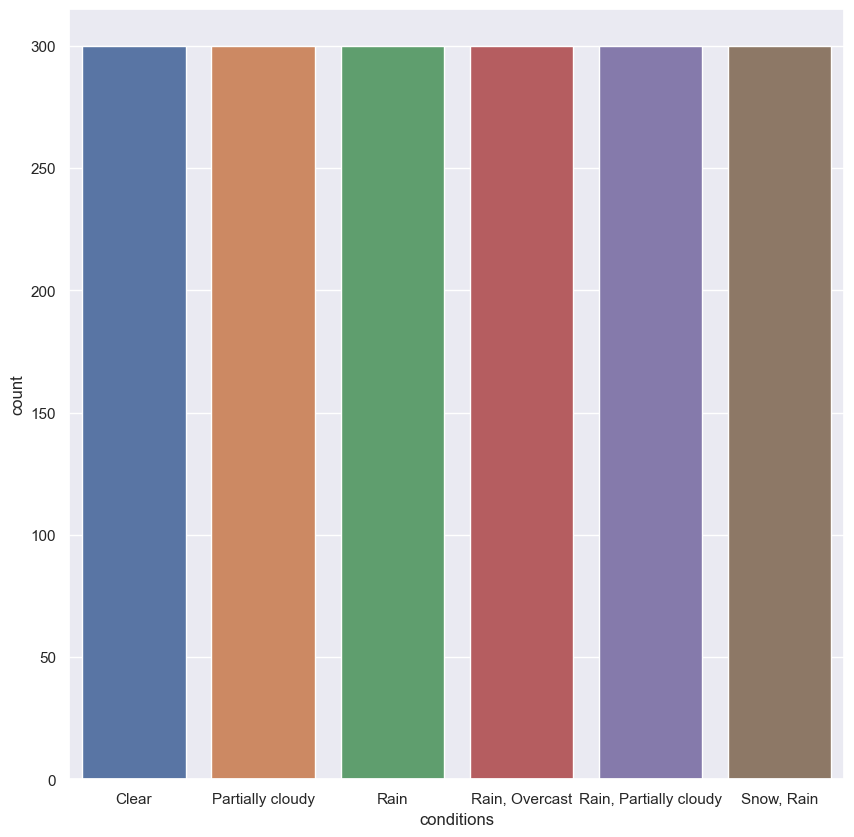

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(df2['conditions'])

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 327 to 139
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          1800 non-null   datetime64[ns]
 1   tempmax           1800 non-null   float64       
 2   tempmin           1800 non-null   float64       
 3   temp              1800 non-null   float64       
 4   feelslikemax      1800 non-null   float64       
 5   feelslikemin      1800 non-null   float64       
 6   feelslike         1800 non-null   float64       
 7   dew               1800 non-null   float64       
 8   humidity          1800 non-null   float64       
 9   precip            1800 non-null   float64       
 10  precipprob        1800 non-null   category      
 11  precipcover       1800 non-null   float64       
 12  preciptype        1212 non-null   object        
 13  snow              1800 non-null   float64       
 14  snowdepth         1800 

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(n_estimators=100,random_state=123)

X = df2[numeric_columns]
y = df2['conditions_code']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

rfc.fit(X_train,y_train)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Convert the targets to categorical values
y_test_encoded = le.fit_transform(y_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(yhat,y_test)

NameError: name 'yhat' is not defined